In [0]:
import numpy as np
from numpy import loadtxt
from sklearn.metrics import confusion_matrix
import os
import cv2
# charting
import matplotlib.pyplot as plt
import seaborn as sns

# metrics
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from keras.models import Model
from keras.models import load_model

In [0]:
img_array=[]

Actual_labels=[]

class_labels = [0,1,2,3,4]
class_dict = {0:'No glaucoma', 1:'Mild glaucoma', 2:'Moderate glaucoma', 3:'Severe glaucoma', 4:'Proliferative glaucoma'}
class_list = ['No glaucoma', 'Mild glaucoma', 'Moderate glaucoma', 'Severe glaucoma', 'Proliferative glaucoma']

In [0]:
model=load_model('/content/drive/My Drive/FinalModel.h5',compile=False)

In [11]:
imageRealTimeTestDir='/content/drive/My Drive/Test'
Predictions=[]
for foldername in os.listdir(imageRealTimeTestDir):
  print('Started this folder ',foldername)
  for filename in os.listdir(imageRealTimeTestDir+"//"+foldername):
    img=cv2.imread(imageRealTimeTestDir+"//"+foldername+"//"+filename)
    backup=img
    img=cv2.resize(img,(128,128))
    img=np.reshape(img,[1,128,128,3])
    output=model.predict([img])
    ind=np.argmax(output[0])
    Predictions.append(ind)
    Actual_labels.append(int(foldername))
  

Started this folder  0
Started this folder  1
Started this folder  4
Started this folder  3
Started this folder  2


In [21]:
array=confusion_matrix(Actual_labels,Predictions)

print(array)

[[173   6   7   0   1]
 [  3  30   3   0   1]
 [  0   6  88   6   0]
 [  0   0   3  16   1]
 [  0   0   0   2  28]]


In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

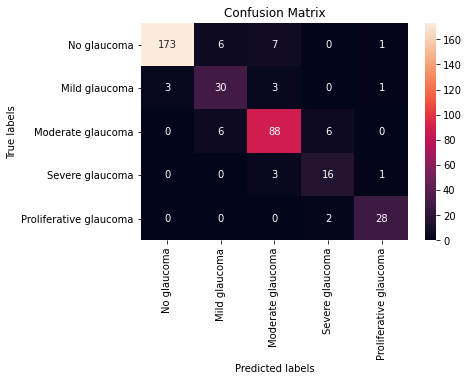

<Figure size 432x288 with 0 Axes>

In [23]:
df_cm = pd.DataFrame(array, index = [i for i in class_list],
                  columns = [i for i in class_list])

ax=plt.subplot()

sn.heatmap(df_cm,annot=True,fmt='d') # font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_list)
ax.yaxis.set_ticklabels(class_list)
plt.show()


In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
score=precision_score(Actual_labels,Predictions,average='macro')
print("Precision score is {}%".format(score*100))

score=accuracy_score(Actual_labels,Predictions)
print("Accuracy score is {}%".format(score*100))

Precision score is 82.76839723142821%
Accuracy score is 89.57219251336899%
